In [7]:
!pip install tensorflow
!pip install matplotlib


  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.59.0-cp312-cp312-manylinux1_x86_64.manylinux2014_x86_64.manylinux_2_17_x86_64.manylinux_2_5_x86_64.whl.metadata (107 kB)
  Using cached pillow-11.3.0-cp312-cp312-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (9.0 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 12.6 MB/s  0:00:00 eta 0:00:01
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.59.0-cp312-cp312-manylinux1_x86_64.manylinux2014_x86_64.manylinux_2_17_x86_64.manylinux_2_5_x86_64.whl (4.9 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 23.6 MB/s  0:00:00
Using cached pillow-11.3.0-cp312-cp312-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl (6.6 MB)
Using cached pyparsing-3.2.3-py3-none-any.whl (111 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7/7 [matplotlib]7 [matplotlib]


In [8]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [19]:
mnist = tf.keras.datasets.mnist

In [20]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

print("Train shape before normalization:", x_train.shape)

Train shape before normalization: (60000, 28, 28)


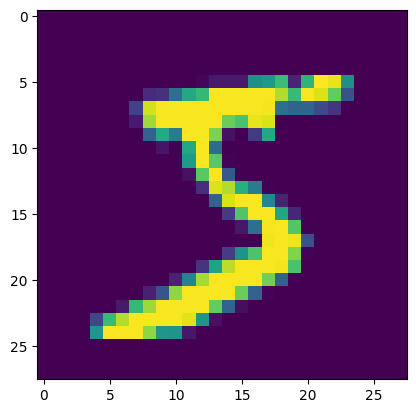

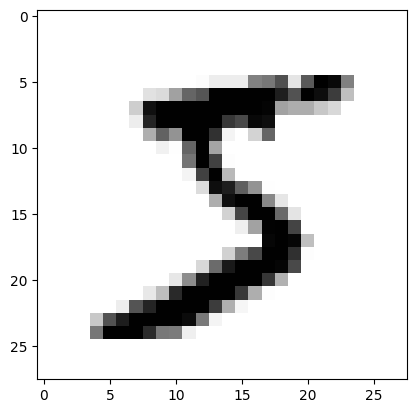

In [21]:
plt.imshow(x_train[0])
plt.show()
plt.imshow(x_train[0], cmap=plt.cm.binary)

In [22]:
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)
print("Train shape after normalization:", x_train.shape)

Train shape after normalization: (60000, 28, 28)


In [23]:
print(y_train[0])

5


In [24]:
!pip install numpy
import numpy as np
IMG_SIZE = 28
x_trainr = np.array(x_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
x_testr = np.array(x_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
print("Training Samples dimension", x_trainr.shape)
print("Testing Samples dimension", x_testr.shape)

Training Samples dimension (60000, 28, 28, 1)
Testing Samples dimension (10000, 28, 28, 1)


In [25]:
print(x_train.shape)


(60000, 28, 28)


**CREATING A DEEP NEURAL NETWORK**

In [30]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"  # Disable GPU, force CPU use

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, Activation, MaxPooling2D, Flatten, Dense

model = Sequential()

# Define input shape explicitly using Input layer
model.add(Input(shape=x_trainr.shape[1:]))

# First Convolutional Layer
model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second Convolutional Layer
model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Third Convolutional Layer
model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Fully Connected Layers
model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))
model.add(Dense(32))
model.add(Activation("relu"))

# Output Layer
model.add(Dense(10))
model.add(Activation('softmax'))


In [31]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 11, 11, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_10 (Activation)      │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           330 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_11 (Activation)      │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 81,066 (316.66 KB)

 Trainable params: 81,066 (316.66 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics=['accuracy'])
model.fit(x_trainr, y_train, epochs=7, validation_split=0.3) #Training the model

Epoch 1/7
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - accuracy: 0.9865 - loss: 0.0424 - val_accuracy: 0.9832 - val_loss: 0.0610
Epoch 2/7
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 18s 14ms/step - accuracy: 0.9890 - loss: 0.0345 - val_accuracy: 0.9813 - val_loss: 0.0625
Epoch 3/7
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step - accuracy: 0.9910 - loss: 0.0259 - val_accuracy: 0.9782 - val_loss: 0.0770
Epoch 4/7
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 23s 17ms/step - accuracy: 0.9928 - loss: 0.0222 - val_accuracy: 0.9806 - val_loss: 0.0698
Epoch 5/7
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 21s 16ms/step - accuracy: 0.9932 - loss: 0.0198 - val_accuracy: 0.9843 - val_loss: 0.0614
Epoch 6/7
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 22s 17ms/step - accuracy: 0.9950 - loss: 0.0162 - val_accuracy: 0.9766 - val_loss: 0.1073
Epoch 7/7
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 21s 16ms/step - accuracy: 0.9948 - loss: 0.0152 - val_accuracy: 0.9856 - val_loss: 0.0586


In [35]:
#Evaluating the model
test_loss, test_acc = model.evaluate(x_testr, y_test)
print("Test loss on 10,000 test samples", test_loss)
print("Validation Accuracy on 10,000 test samples", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9879 - loss: 0.0525
Test loss on 10,000 test samples 0.05249270796775818
Validation Accuracy on 10,000 test samples 0.9879000186920166


In [37]:
predictions = model.predict(x_testr)
print(predictions)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
[[3.92646554e-10 2.08064321e-07 5.76610944e-07 ... 9.99998450e-01
  2.22783321e-08 2.27018447e-07]
 [4.94654557e-07 5.84018132e-08 9.99995351e-01 ... 3.87496993e-06
  3.03315068e-10 1.88044114e-09]
 [1.77447852e-08 9.99999642e-01 1.63715708e-08 ... 7.62209353e-08
  5.18282250e-10 1.22459864e-08]
 ...
 [8.04368100e-11 3.35723094e-08 1.70585562e-12 ... 4.53311344e-09
  1.90953431e-09 9.04372754e-09]
 [4.27477926e-06 8.24462418e-08 6.06841555e-09 ... 4.14197165e-09
  5.01914328e-05 2.29294756e-06]
 [3.19914693e-06 3.44475239e-08 2.21098048e-07 ... 4.66470307e-10
  1.50509493e-06 7.38476942e-08]]
